# Day3-1 作業
### 在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果。請嘗試想像一個你需要的資料結構 (裡面的值是隨機的)，然後用程式碼範例的方法把它變成 DataFrame

In [103]:
import pandas as pd
import numpy as np
from numpy.random import randint

In [104]:
data = {'Country': ['Taiwan','Japen','China','Malaysia','USA','UK','Korea','Thailand','Spain','Germany','France','Turkey'],
        'Population': randint(1000000,100000000,size=12)}
df = pd.DataFrame(data)

In [105]:
df

,Country,Population
0,Taiwan,48902855
1,Japen,59540406
2,China,83506609
3,Malaysia,72449308
4,USA,65596646
5,UK,6648292
6,Korea,84659060
7,Thailand,13319286
8,Spain,98735301
9,Germany,5653690


In [106]:
df2 = df.set_index('Country')
m = df2['Population'].idxmax() #人口最多的國家
n = df2['Population'].max()    #人口最多的數量
print("人口最多的國家:{}, 人口有:{}".format(m,n))

人口最多的國家:Spain, 人口有:98735301


# Day3-2 作業
* 讀取 [.txt檔](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)

* 請讀取 text file
懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

## 方法一

In [122]:
import pandas as pd

data = []
with open('./data/imagenet_urls_examples.txt', 'r',encoding='utf8') as f:
    for l in f:
        l = l.split('\t')
        data.append(l)
df = pd.DataFrame(data)
df.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 方法二

In [140]:
import requests
url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'
r = requests.get(url)
data_ = r.text.split('\n')
data2 = []
for j in data_:
    j = j.split('\t')
    data2.append(j)
df2 = pd.DataFrame(data2)
df2.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取第一張圖片

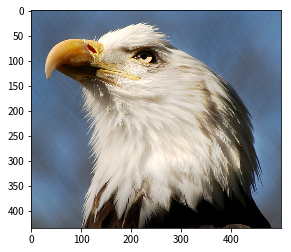

In [146]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

first_link = df.loc[0][1]
r = requests.get(first_link)
img = Image.open(BytesIO(r.content))

plt.imshow(img)
plt.show()

## 讀取前五張圖片

In [154]:
def img2arr_fromURLs(url_list, resize = False):
    img_list = []
    for k in url_list:
        try:
            r = requests.get(k)
            img = Image.open(BytesIO(r.content))
            img_list.append(img)
        except OSError:
            continue
    return img_list

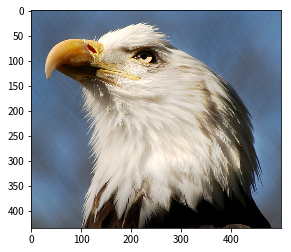

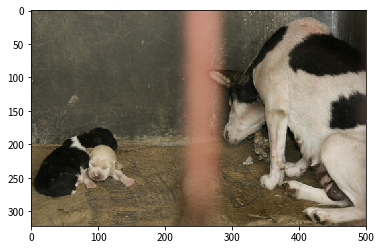

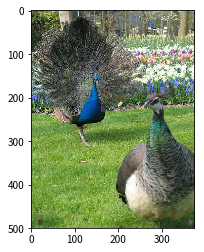

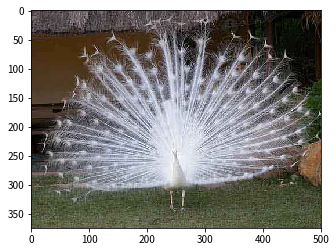

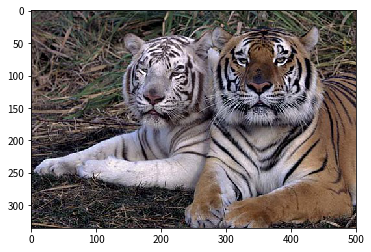

In [159]:
url_list = df[0:10][1].values
result = img2arr_fromURLs(url_list, False)
for g in result:
    plt.imshow(g)
    plt.show()
    